<a href="https://colab.research.google.com/github/nam3065/credit-risk-final-report/blob/main/Final_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

bankloan_data = pd.read_excel('/content/drive/MyDrive/soton study/Credit risk and data analysis/Credit data.xlsx', engine='openpyxl')

In [3]:
bankloan_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.629741,32,0,338.000000,NaN,2,0,0,0,0.0
9996,0,0.062614,62,0,745.000000,NaN,10,0,1,0,0.0
9997,0,0.827427,50,0,1904.000000,NaN,4,0,0,0,0.0
9998,0,0.091174,77,1,0.020636,10999.0,9,0,0,0,0.0


In [4]:
# Add a column of ascending numbers before SeriousDlqin2yrs
bankloan_data.insert(0, 'ID', range(1, len(bankloan_data) + 1))

# Move 'SeriousDlqin2yrs' column to the last position
column_to_move = 'SeriousDlqin2yrs'
columns = [col for col in bankloan_data.columns if col != column_to_move]  # Exclude SeriousDlqin2yrs
columns.append(column_to_move)  # Append it at the end

# Reorder DataFrame
bankloan_data = bankloan_data[columns]
# Change SeriousDlqin2yrs into Default
bankloan_data = bankloan_data.rename(columns={'SeriousDlqin2yrs': 'Default'})

# Display the result
print(bankloan_data.head())

   ID  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                              0.766127   45   
1   2                              0.957151   40   
2   3                              0.658180   38   
3   4                              0.233810   30   
4   5                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                   

In [5]:
bankloan_data.dtypes

,0
ID,int64
RevolvingUtilizationOfUnsecuredLines,float64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberRealEstateLoansOrLines,int64
NumberOfTime60-89DaysPastDueNotWorse,int64


In [6]:
bankloan_data.iloc[:,1:].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
count,10000.000000,10000.000000,10000.000000,10000.000000,8026.000000,10000.00000,10000.00000,10000.00000,10000.000000,9716.000000,10000.000000
mean,4.931206,52.164200,0.385100,350.457248,6606.379143,8.34500,0.23150,1.00800,0.202200,0.748868,0.064000
std,160.479674,14.778792,3.723733,2243.983903,6787.373041,5.06738,3.69154,1.08446,3.675985,1.126723,0.244765
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.031135,41.000000,0.000000,0.173605,3400.000000,5.00000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.165328,52.000000,0.000000,0.367083,5400.000000,8.00000,0.00000,1.00000,0.000000,0.000000,0.000000
75%,0.571746,62.000000,0.000000,0.847257,8200.000000,11.00000,0.00000,2.00000,0.000000,1.000000,0.000000
max,9340.000000,101.000000,98.000000,168835.000000,208333.000000,46.00000,98.00000,17.00000,98.000000,20.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import seaborn as sns
import numpy as np

Data    Cleaing

Null values
The core function here will be Panda's fillna. This allows to replace all null values (represented by None or NaN in Python) by a certain value. This also allows to set what the replacement will be with the value argument. See the help for details.

Remember the strategies to deal :

Keep: If the null values are a category by themselves. In this case, replace by something meaningful.

Delete: If the null values are too many either by row or by column then it is better to just drop the case or the variable.

Replace: If there are only a few missings for the variable or the row (<1% total), replace by the replace the null values by the median for continous variables, and the mode for categorical values.

A quick study of our dataset shows there are no missing values, but if there were and we were to replace them, we could do it quickly with the following code.

In [9]:
# Missing value counts
pd.DataFrame({'count':bankloan_data.isnull().sum().values, 'ratio': bankloan_data.isnull().mean() * 100})


,count,ratio
ID,0,0.00
RevolvingUtilizationOfUnsecuredLines,0,0.00
age,0,0.00
NumberOfTime30-59DaysPastDueNotWorse,0,0.00
DebtRatio,0,0.00
MonthlyIncome,1974,19.74
NumberOfOpenCreditLinesAndLoans,0,0.00
NumberOfTimes90DaysLate,0,0.00
NumberRealEstateLoansOrLines,0,0.00
NumberOfTime60-89DaysPastDueNotWorse,0,0.00


Clearly, missing values count for more than 1%, so we cannot replace it with median and mode approach. Take a deep analysis in the data set!!

In [10]:
# Explore NumberOfDependents', 'DebtRatio for missing values of MonthlyIncome
bankloan_data[bankloan_data['MonthlyIncome'].isnull()][['NumberOfDependents', 'DebtRatio']].describe()


,NumberOfDependents,DebtRatio
count,1690.000000,1974.000000
mean,0.333728,1664.422492
std,0.817141,4783.023189
min,0.000000,0.000000
25%,0.000000,115.500000
50%,0.000000,1131.500000
75%,0.000000,2327.500000
max,6.000000,168835.000000


Missing MonthlyIncome is associated with abnormally high DebtRatio values. This suggests that missing income could be related to financial distress or poor reporting, which might indicate higher credit risk.

In [11]:
# Explore MonthlyIncome', 'DebtRatio' for missing values of NumberOfDependents
bankloan_data[bankloan_data['NumberOfDependents'].isnull()][['MonthlyIncome', 'DebtRatio']].describe()


,MonthlyIncome,DebtRatio
count,0.0,284.000000
mean,NaN,852.200704
std,NaN,1256.164840
min,NaN,0.000000
25%,NaN,24.000000
50%,NaN,320.000000
75%,NaN,1282.250000
max,NaN,8078.000000


Bingoo ! Missing NumberOfDependents is also associated with high DebtRatio values, though these values are less extreme compared to rows with missing MonthlyIncome.

And missing value of NumberOfDependents associates with missing value of MonthlyIncome

In [12]:
#evaluates the proportion of the dataset where:

#       DebtRatio is unusually high (> 100), and
#       MonthlyIncome is missing (NaN).
bankloan_data[bankloan_data['DebtRatio']>100]['MonthlyIncome'].isnull().sum()/len(bankloan_data)*100

15.079999999999998

In [13]:
bankloan_data[bankloan_data['MonthlyIncome'].isnull()]['NumberOfDependents'].isnull().sum()/len(bankloan_data)*100

2.8400000000000003

15% of the total dataset has DebtRatio > 100 and missing values in MonthlyIncome.

2.84% of the total dataset has both missing value of MonthlyIncome and NumberOfDependents

**See how MonthlyIncome with value of DebtRatio more and less than 100**

In [14]:
bankloan_data[(bankloan_data['DebtRatio']>100) & (bankloan_data['MonthlyIncome'].notnull())]['MonthlyIncome'].describe()


,MonthlyIncome
count,119.000000
mean,0.697479
std,2.978894
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,25.000000


In [15]:
bankloan_data[(bankloan_data['DebtRatio']<100) & (bankloan_data['MonthlyIncome'].notnull())]['MonthlyIncome'].describe()


,MonthlyIncome
count,7907.000000
mean,6705.794359
std,6789.342771
min,0.000000
25%,3500.000000
50%,5444.000000
75%,8300.000000
max,208333.000000


**Handling missing value of Monthly Income**

Records with missing Monthly Income have high Debt Ratio (Mean 1664.422492)

Summary Stat of Borrowers with high Debt Ratio shows that the Monthly Income of these Borrowers are 0

This could mean Borrowers with missing Monthly Income delibrately left the column blank because they are trivial workers not earning Monthly Income

The best method to handle this missing values is to replace it with 0

**Handling Missing Number of Dependents**

Records with missing Number of Dependents occured simultaneously with missing missing MonthlyIncome (i.e they share the same index)

This shows that same set of borrowers that left their Monthly Income blank also left Number of Dependents field Blank.

Summary stat of Borrowers with missing monthly Income reveals they have no dependents

It's quite logical that this category of borrowers with little to no Income have no dependents.

Thus, the best way to handle this missing values is to replace with 0 which is also consisent with the Range of this Variable

In [16]:
bankloan_data['MonthlyIncome'].replace(np.nan, 0, inplace=True)
bankloan_data['NumberOfDependents'].replace(np.nan, 0, inplace=True)

<ipython-input-16-93c76d3632ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bankloan_data['MonthlyIncome'].replace(np.nan, 0, inplace=True)
<ipython-input-16-93c76d3632ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [17]:
# Change data type of NumberOfDependents into int64
bankloan_data['NumberOfDependents'] = bankloan_data['NumberOfDependents'].astype('int64')

In [18]:
bankloan_data.iloc[:,1:].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4.931206,52.164200,0.385100,350.457248,5302.279900,8.34500,0.23150,1.00800,0.202200,0.727600,0.064000
std,160.479674,14.778792,3.723733,2243.983903,6624.877767,5.06738,3.69154,1.08446,3.675985,1.117552,0.244765
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.031135,41.000000,0.000000,0.173605,1600.000000,5.00000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.165328,52.000000,0.000000,0.367083,4337.000000,8.00000,0.00000,1.00000,0.000000,0.000000,0.000000
75%,0.571746,62.000000,0.000000,0.847257,7383.250000,11.00000,0.00000,2.00000,0.000000,1.000000,0.000000
max,9340.000000,101.000000,98.000000,168835.000000,208333.000000,46.00000,98.00000,17.00000,98.000000,20.000000,1.000000


**EDA**

1. REVOLVING CREDIT UTILIZATION RATIO

In [19]:
bankloan_data['RevolvingUtilizationOfUnsecuredLines'].describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,10000.0,4.931206,160.479674,0.0,0.031135,0.165328,0.571746,9340.0


In [20]:
bankloan_data[bankloan_data['RevolvingUtilizationOfUnsecuredLines'] >
              bankloan_data['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)]['RevolvingUtilizationOfUnsecuredLines'].describe()

,RevolvingUtilizationOfUnsecuredLines
count,100.000000
mean,461.547842
std,1545.439128
min,1.063782
25%,1.126124
50%,1.253118
75%,1.638554
max,9340.000000


<ipython-input-21-fb9805927c8f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = np.array(bankloan_data['RevolvingUtilizationOfUnsecuredLines']),


Text(0.5, 1.0, 'Box Plot of RevolvingUtilizationOfUnsecuredLines')

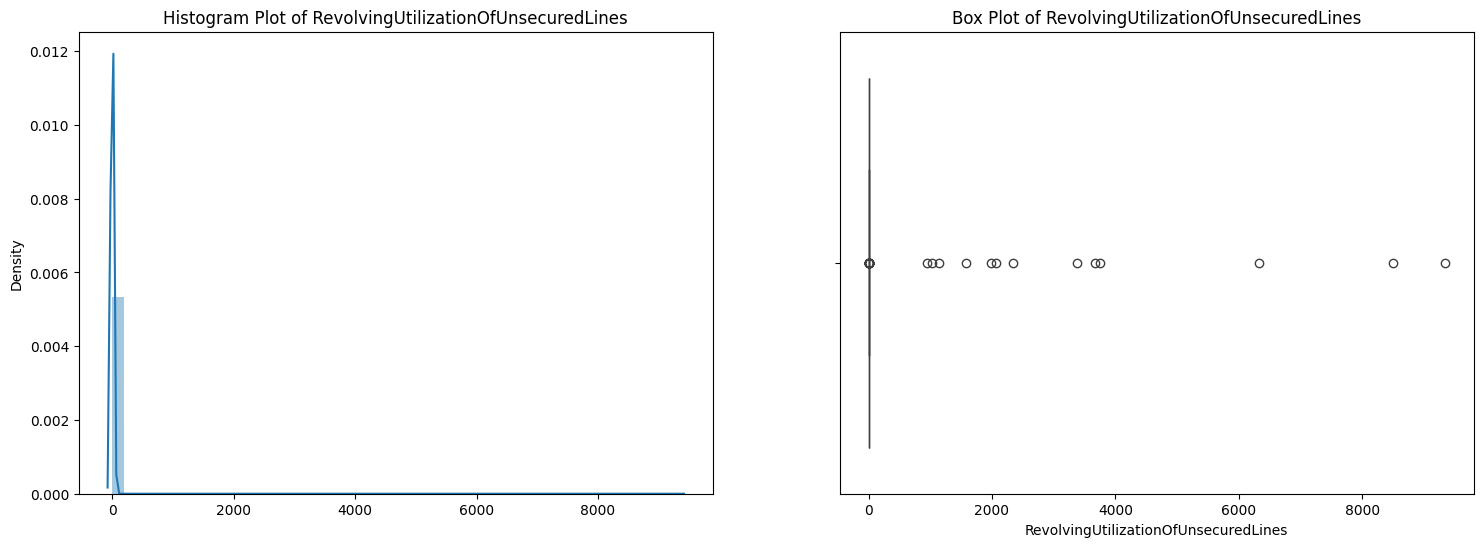

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.distplot(x = np.array(bankloan_data['RevolvingUtilizationOfUnsecuredLines']),
             ax = axes[0])
axes[0].set_title('Histogram Plot of RevolvingUtilizationOfUnsecuredLines')
sns.boxplot(x = bankloan_data['RevolvingUtilizationOfUnsecuredLines'], ax = axes[1])
axes[1].set_title('Box Plot of RevolvingUtilizationOfUnsecuredLines')

Not much sense can be made of the plots due to high level of skewness. The summary stats shows that the mean is 40 times bigger than the median and there is huge change in values beyond the 99th percentile value. There are notable extreme outliers.



In [22]:
below_1 = bankloan_data[bankloan_data['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'].count()*100/len(bankloan_data)
bet_1_10 = bankloan_data[(bankloan_data['RevolvingUtilizationOfUnsecuredLines'] > 1) &
        (bankloan_data['RevolvingUtilizationOfUnsecuredLines'] < 10)]['RevolvingUtilizationOfUnsecuredLines'].count() * 100/len(bankloan_data)
beyond_10 = bankloan_data[bankloan_data['RevolvingUtilizationOfUnsecuredLines'] > 10]['RevolvingUtilizationOfUnsecuredLines'].count()*100/len(bankloan_data)

Text(0.5, 1.0, '2.0% of Dataset')

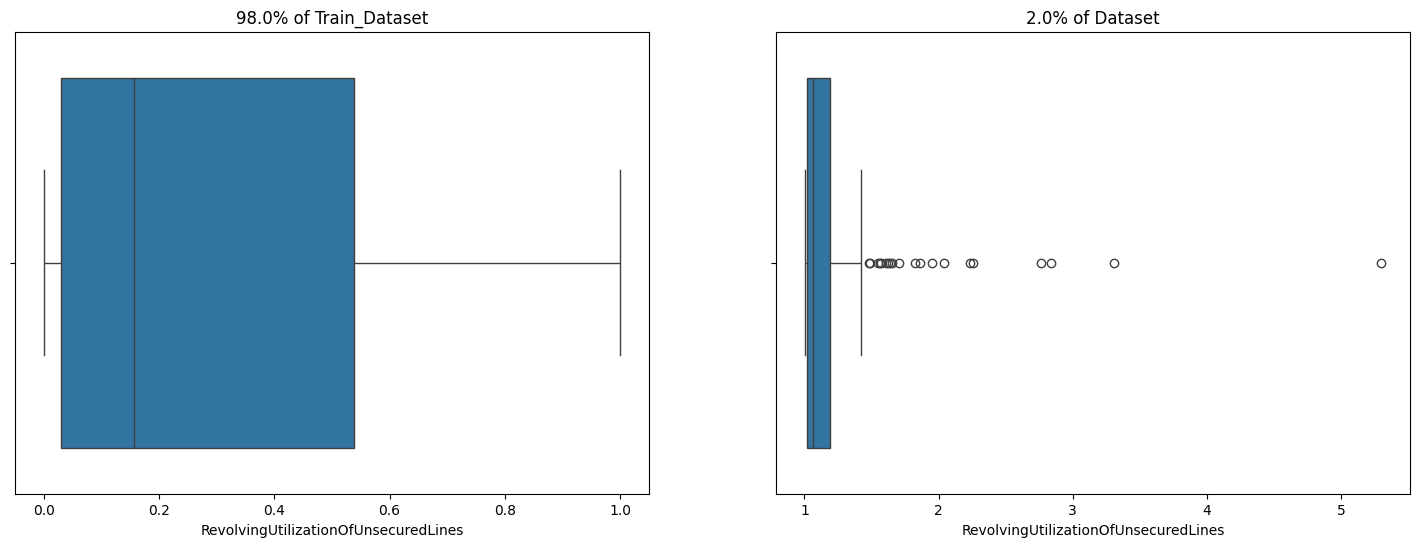

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(x = bankloan_data[bankloan_data['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'],
            ax = axes[0])
axes[0].set_title('{}% of Train_Dataset'.format(round(below_1, 0)))
sns.boxplot(x = bankloan_data[(bankloan_data['RevolvingUtilizationOfUnsecuredLines'] > 1) &
                        (bankloan_data['RevolvingUtilizationOfUnsecuredLines'] < 10)]['RevolvingUtilizationOfUnsecuredLines'],
            ax = axes[1])
axes[1].set_title('{}% of Dataset'.format(round(bet_1_10, 0)))

In [24]:
bankloan_data[bankloan_data['RevolvingUtilizationOfUnsecuredLines'] > 10]['RevolvingUtilizationOfUnsecuredLines'].count()/len(bankloan_data)*100


0.13

Approximately 98% of values of this Variable are between 0 and 1 with a well defined right-skewed distribution. Generally, Credit Utilization is expected to be within this regio (0 - 1). Altough, Borrowers can sometimes spend beyond credit limit. Values between 1 and 10 make up 2% of the dataset. Values beyond 10 are extremely big and they make up less than 0.5% of our data, these values would be dropped to prevent them from impacting our model.

**2. DEBT RATIO**

In [25]:
bankloan_data['DebtRatio'].describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
DebtRatio,10000.0,350.457248,2243.983903,0.0,0.173605,0.367083,0.847257,168835.0


In [26]:
bankloan_data.DebtRatio.quantile([.975])


,DebtRatio
0.975,3308.175


Apparently 2.5% of the dataset owes more than 3,300 times what they own. We need to investigate further to see if these are outliers or not. We can see:

In [27]:
bankloan_data[bankloan_data['DebtRatio'] > 3308.175][['Default','MonthlyIncome']].describe()


,Default,MonthlyIncome
count,250.000000,250.000000
mean,0.064000,0.004000
std,0.245244,0.063246
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


We see two particularly concerning things here. The first is that of 250 records with DebtRatio > 3,300, none of them have a value for monthly income. Further, the people who do have monthly income seem to either have a monthly income of either 1 or 0. We see that:

In [28]:
bankloan_data[(bankloan_data['DebtRatio'] > 3308.175) & (bankloan_data['Default'] == bankloan_data['MonthlyIncome'])].shape[0]


233

...of those 250 entries, 233 of them have the same value for 2 year default rate and monthly income, indicating that there is a data-entry error.

The second problem is that despite owing thousands of times what they own, these people aren't defaulting any more than the general population. We can conclude that these entries must be data-entry errors, so we will remove them from our model.

<ipython-input-29-71a28596277e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = np.array(bankloan_data['DebtRatio']),


Text(0.5, 1.0, 'Box Plot of Debt Ratio')

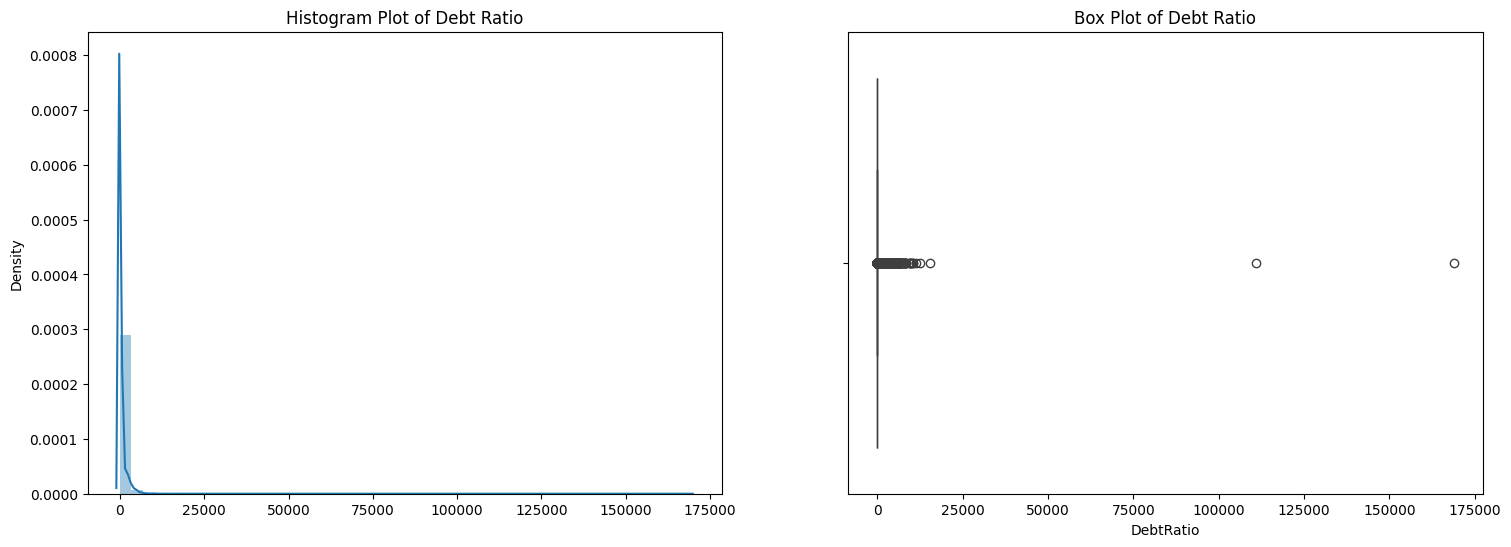

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.distplot(x = np.array(bankloan_data['DebtRatio']),
             ax = axes[0])
axes[0].set_title('Histogram Plot of Debt Ratio')
sns.boxplot(x = bankloan_data['DebtRatio'], ax = axes[1])
axes[1].set_title('Box Plot of Debt Ratio')

In [30]:
pd.DataFrame({'below 1': bankloan_data[bankloan_data['DebtRatio'] <= 1]['DebtRatio'].count()*100/len(bankloan_data),
             'between 1 - 10': bankloan_data[(bankloan_data['DebtRatio'] > 1) &
                                        (bankloan_data['DebtRatio'] <=10)]['DebtRatio'].count()*100/len(bankloan_data),
             'beyond 10': bankloan_data[bankloan_data['DebtRatio'] > 10]['DebtRatio'].count()*100/len(bankloan_data)}, index = [1])

,below 1,between 1 - 10,beyond 10
1,76.85,4.09,19.06


In [31]:
bankloan_data[(bankloan_data['DebtRatio'] > 1) & (bankloan_data['DebtRatio'] <=10)]['DebtRatio'].describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
DebtRatio,409.0,2.545263,2.242895,1.0005,1.159467,1.508306,3.0,10.0


In [32]:
bankloan_data[bankloan_data['DebtRatio'] > 10]['DebtRatio'].describe().describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
DebtRatio,8.0,22700.18763,59065.877892,10.171276,1075.25,1871.465417,3056.974732,168835.0


77% of values in this variable are between 0 - 1

4% are between 1 - 10

The remaining 19% have high values (Median of 1871). Outliers responsible for skewing the Variable


**3. AGE**

<Axes: ylabel='age'>

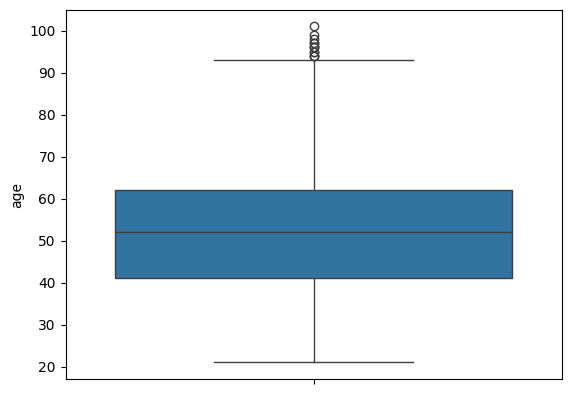

In [33]:
# Boxplot of AGE
sns.boxplot(data = bankloan_data['age'])



Age tends to have a somewhat reasonable distribution. There are a suspicious number of centenarians but plausible.

**4. NUMBER OF OPEN CREDIT LINES**

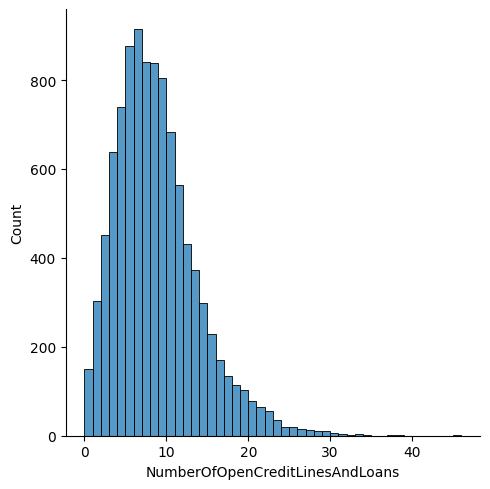

In [34]:
#sns.histplot(x = bankloan_data['NumberOfOpenCreditLinesAndLoans'], binwidth=1, ax = axes[0])
sns.displot(data=bankloan_data['NumberOfOpenCreditLinesAndLoans'], kind="hist", binwidth=1 )


This variable is right-skewed with no extreme values. Further preprocessing of this data would be aggregating similar Category (Fine Class) to a Coarse class during WOE Feature Engineering and Data Preprocessing.

**5. NUMBER OF REAL ESTATE LOANS AND LINES**

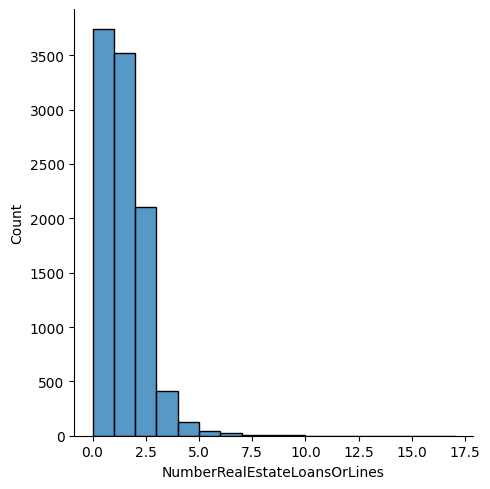

In [35]:
sns.displot(data=bankloan_data['NumberRealEstateLoansOrLines'], kind="hist", binwidth=1 )


This variable is highly skewed to the right, Majority of the Borrowers have between 0 to 2 Mortgage loans. Further preprocessing of this data would be aggregating similar Category (Fine Class) to a Coarse class during WOE Feature Engineering and Data Preprocessing.



**6. NUMBER OF DEPENDENTS**


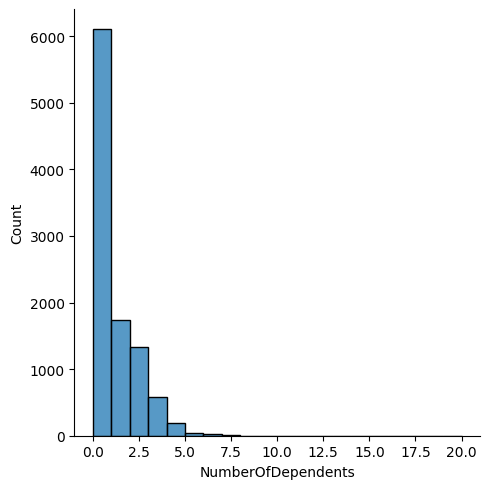

In [36]:
sns.displot(data=bankloan_data['NumberOfDependents'], kind="hist", binwidth=1 )



In [37]:
bankloan_data['NumberOfDependents'].value_counts()
# Get the cumulative frequency distribution of NumberOfDependents


,count
NumberOfDependents,
0,6104
1,1732
2,1326
3,576
4,194
5,42
6,19
7,4
8,2


This variable is right skewed. Majority of the Borrowers have between 0 - 3 Dependents. Further preprocessing of this data would be aggregating similar Category (Fine Class) to a Coarse class during WOE Feature Engineering and Data Preprocessing.

**7. NUMBER OF DAYS PAST DUE**

In [38]:
due_30_59 = pd.DataFrame(bankloan_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()).rename(columns = {'NumberOfTime30-59DaysPastDueNotWorse':'30-59days'})
due_60_89 =  pd.DataFrame(bankloan_data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()).rename(columns = {'NumberOfTime60-89DaysPastDueNotWorse':'60-89days'})
due_90 = pd.DataFrame(bankloan_data['NumberOfTimes90DaysLate'].value_counts()).rename(columns = {'NumberOfTimes90DaysLate':'90days'})
pd.concat([due_30_59, due_60_89, due_90], axis = 1)

,count,count,count
0,8387.0,9481.0,9415.0
1,1102.0,403.0,369.0
2,282.0,74.0,108.0
3,131.0,18.0,58.0
4,42.0,6.0,17.0
5,19.0,3.0,8.0
98,14.0,14.0,14.0
6,13.0,1.0,7.0
7,7.0,NaN,1.0
10,1.0,NaN,1.0


In [39]:
bankloan_data[bankloan_data['NumberOfTime30-59DaysPastDueNotWorse'] > 17][['NumberOfTime30-59DaysPastDueNotWorse',
                                                                'NumberOfTime60-89DaysPastDueNotWorse',
                                                                'NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
1733,98,98,98
2286,98,98,98
3884,98,98,98
4417,98,98,98
4705,98,98,98
5073,98,98,98
6280,98,98,98
7032,98,98,98
7117,98,98,98
7687,98,98,98


In [40]:
bankloan_data[bankloan_data['NumberOfTime30-59DaysPastDueNotWorse'] > 17]['Default'].mean()*100


50.0

These Features have similar distribution. There is one unique value (98). It is impossible for a borrower to exhibit delinquency 98 times in space of 2 years. It can also be observerd that these values share the same corresponding index, which might indicates Data Entry error. However, they can't be dropped due to high information they possess in identifying defaulting members. 50% of Borrowers in this category defaulted compared to 6% global default rate. We can Winsorize by replacing all the 98s with 10s to make them not extreme outliers and see if that improves the models.

**8.Monthly Income**

<Axes: ylabel='MonthlyIncome'>

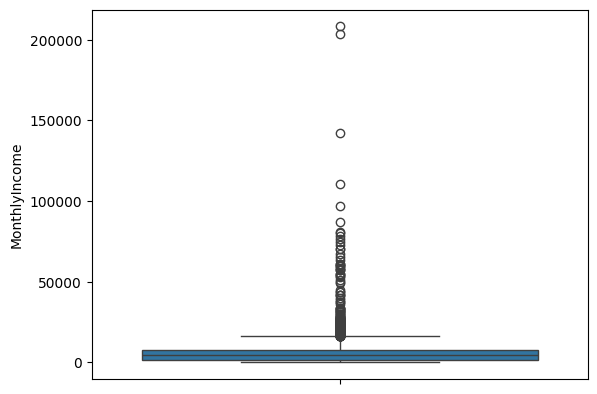

In [41]:
# sns.histplot(bankloan_data['MonthlyIncome'], bins=30, kde=True)
sns.boxplot(data = bankloan_data['MonthlyIncome'])
# Boxplot of monthlyincome



In [42]:
bankloan_data['MonthlyIncome'].describe()

,MonthlyIncome
count,10000.000000
mean,5302.279900
std,6624.877767
min,0.000000
25%,1600.000000
50%,4337.000000
75%,7383.250000
max,208333.000000


In [43]:
bankloan_data[bankloan_data['MonthlyIncome'] >
              bankloan_data['MonthlyIncome'].quantile(0.99)]['MonthlyIncome'].describe()

,MonthlyIncome
count,100.000000
mean,45592.240000
std,31573.460744
min,24750.000000
25%,26075.000000
50%,32666.500000
75%,57000.000000
max,208333.000000


9. Default

Proportion of People Who Defaulted: 0.064


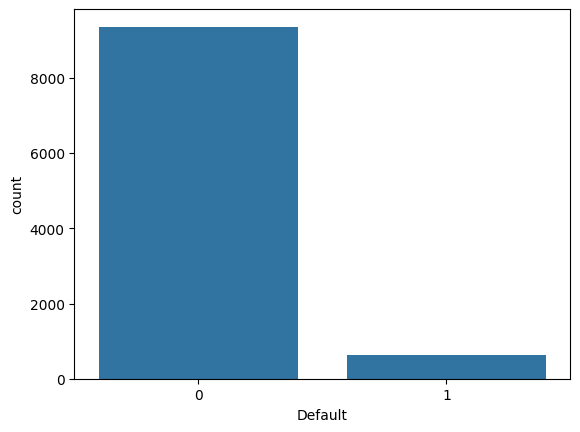

In [44]:
bankloan_data['Default'].value_counts()/len(bankloan_data)
sns.countplot(x="Default", data=bankloan_data)
print("Proportion of People Who Defaulted: {}".format(bankloan_data["Default"].sum() / len(bankloan_data)))

# Outlier remove

In [45]:
# Outlier remove
bankloan_data = bankloan_data.drop(bankloan_data[bankloan_data['DebtRatio'] > 3308.175].index)
bankloan_data = bankloan_data.fillna(bankloan_data.median())
bankloan_data = bankloan_data.drop(bankloan_data[bankloan_data['MonthlyIncome'] > 60000].index)


In [46]:
# RevolvingUtilizationOfUnsecuredLines < 10
bankloan_data = bankloan_data.loc[(bankloan_data['RevolvingUtilizationOfUnsecuredLines'] < 10)]

In [47]:
bankloan_data.loc[bankloan_data['NumberOfTime30-59DaysPastDueNotWorse'] > 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 10
bankloan_data.loc[bankloan_data['NumberOfTime60-89DaysPastDueNotWorse'] > 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 10
bankloan_data.loc[bankloan_data['NumberOfTimes90DaysLate'] > 90, 'NumberOfTimes90DaysLate'] = 10

In [48]:
#bankloan_data['DebtRatio'].describe()

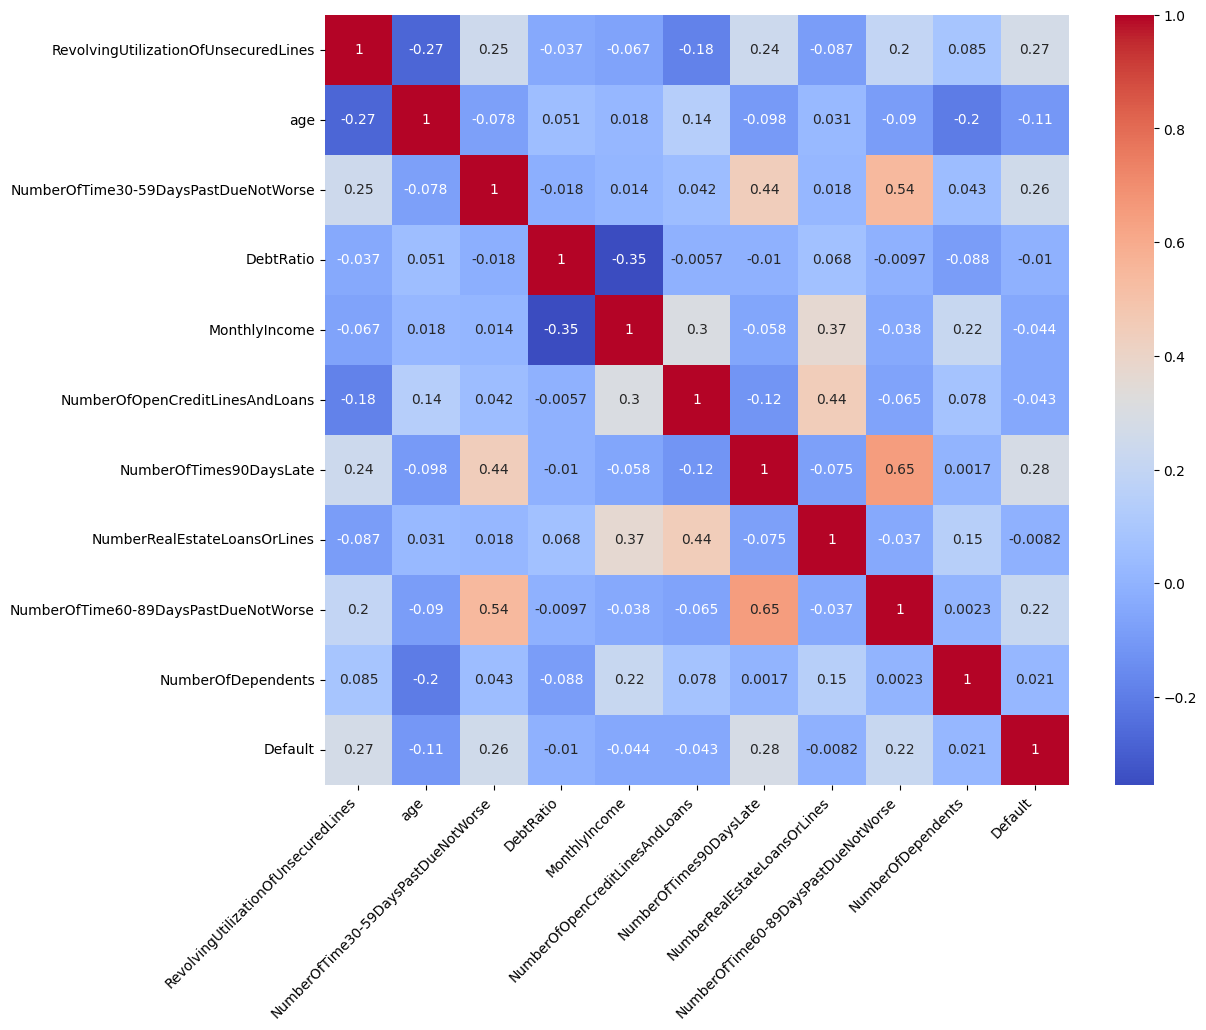

In [49]:
# Make a correlation heatmap
corr = bankloan_data.iloc[:,1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.show()

# Saving the result

In [50]:
# Save dataset to a csv file
bankloan_data.to_csv("Credit data.csv", index = False)

**PART II**

Weight of Evidence Transformation
In this lab we will apply a Weight of Evidence transformation to our data. The idea is to:

Split the data into a train/test set.
Generate a relevant set of cuts to our data.
Calculate the WoE for each variable.
Save the data we just created.
We are assuming we have already cleaned the date of outliers and null values.

In order to do this we will use the fantastic scorecardpy Python package. First we need to install it, as it is not a standard package.

We use the OS python software pip for this.

In [51]:
pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=cf638e17ea249cca73e1e28cea096d2d666ad6170fb771e0880e56cc1150ab58
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


Binning
The first step is to properly bin the data. Usually, we will run a tree and manually adjust those cases that do not follow a logical pattern.

However, as calculating WoE means we need to use the objective variable, we need to first create a train and test split. The scorecard package comes with a function to do so easily, split_df, which takes as an argument the ratio and the seed.

Note: A random seed is used to generate a random split that will be reproducible (is there such as thing as randomness in a computer?). I expect for all coursework for you to use your student ID.

In [52]:
import scorecardpy as sc
import numpy as np

In [53]:
bankloan_data

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2,1
1,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1,0
2,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0,0
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0,0
5,6,0.213179,74,0,0.375607,3500.0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.629741,32,0,338.000000,0.0,2,0,0,0,0,0
9996,9997,0.062614,62,0,745.000000,0.0,10,0,1,0,0,0
9997,9998,0.827427,50,0,1904.000000,0.0,4,0,0,0,0,0
9998,9999,0.091174,77,1,0.020636,10999.0,9,0,0,0,0,0


In [54]:
# Split in train and test BEFORE we apply WoE
# Use your Student ID as seed!

train, test = sc.split_df(bankloan_data.iloc[:,1:],
                          y = 'Default',
                          ratio = 0.7, seed = 36621943).values()

In [55]:
from imblearn.over_sampling import SMOTE
# Extract features (X) and target (y) from training and testing sets
X_train = train.drop(columns=['Default'])  # Training features
y_train = train['Default']                # Training target

X_test = test.drop(columns=['Default'])   # Testing features
y_test = test['Default']                  # Testing target

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=36621943)  # Random seed for reproducibility
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [56]:
# Verify class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE: Default
0    6369
1     433
Name: count, dtype: int64
Class distribution after SMOTE: Default
0    6369
1    6369
Name: count, dtype: int64


In [57]:
# Merge 2 dataframe X_train_resampled and y_train_resampled
train = pd.concat([X_train_resampled, y_train_resampled], axis=1)


In [58]:
train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Default
count,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.00000
mean,0.506576,48.935783,0.440100,180.378970,4857.382929,7.627807,0.289684,0.831057,0.153792,0.624509,0.50000
std,0.405159,13.425737,0.979607,549.738108,4586.921329,4.811925,0.900179,1.090994,0.633257,0.988234,0.50002
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.100469,39.000000,0.000000,0.208747,1991.461963,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.477377,48.000000,0.000000,0.409069,4100.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.50000
75%,0.896196,57.000000,1.000000,0.796114,6676.923478,10.000000,0.000000,1.000000,0.000000,1.000000,1.00000
max,5.299401,98.000000,10.000000,3300.000000,60000.000000,46.000000,10.000000,17.000000,10.000000,20.000000,1.00000


Now we can bin the variables. The function woebin will do this automatically for us. It will use trees sequentially given the constraints we decide. It is good practice to not leave less than 5% of cases in each bin, and I am using 50 starting bins. It might be a bit less given the data is small (say, 20), but it is not terribly important at this stage.

Tip: For larger datasets, use a relatively large number of bins (50 to 100), for smaller ones, use less.

In [59]:
bins = sc.woebin(train, y = 'Default',
                 min_perc_fine_bin=0.02, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

Binning on 12738 rows and 11 columns in 00:00:19


/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be us

Now we can plot the results. We need to be able to explain the results for each variable. We should be able to explain every trend. They do not need to necessarilly be linear, we just need a good explanation for the trend.

If you cannot explain the trend you need to adjust the bins.

{'NumberOfTime30-59DaysPastDueNotWorse': <Figure size 640x480 with 2 Axes>,
 'RevolvingUtilizationOfUnsecuredLines': <Figure size 640x480 with 2 Axes>,
 'DebtRatio': <Figure size 640x480 with 2 Axes>,
 'NumberOfTimes90DaysLate': <Figure size 640x480 with 2 Axes>,
 'MonthlyIncome': <Figure size 640x480 with 2 Axes>,
 'NumberOfTime60-89DaysPastDueNotWorse': <Figure size 640x480 with 2 Axes>,
 'NumberOfDependents': <Figure size 640x480 with 2 Axes>,
 'NumberRealEstateLoansOrLines': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'NumberOfOpenCreditLinesAndLoans': <Figure size 640x480 with 2 Axes>}

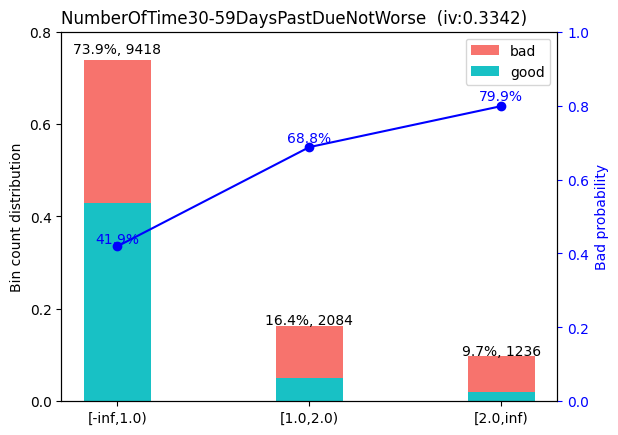

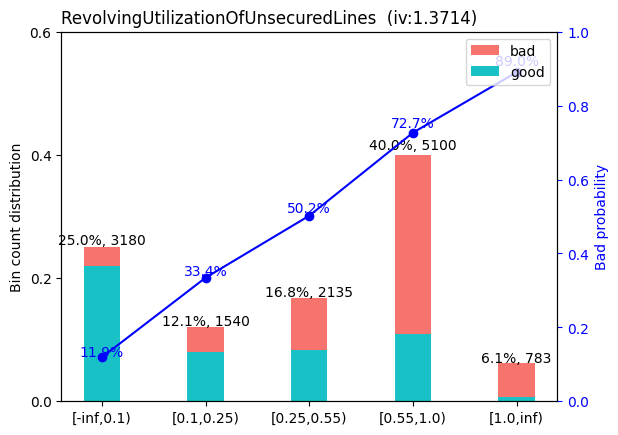

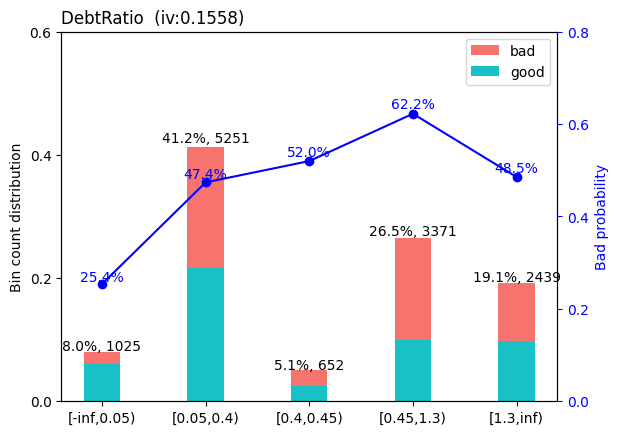

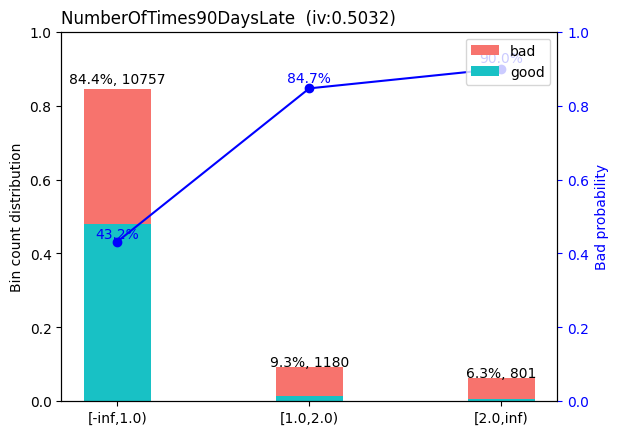

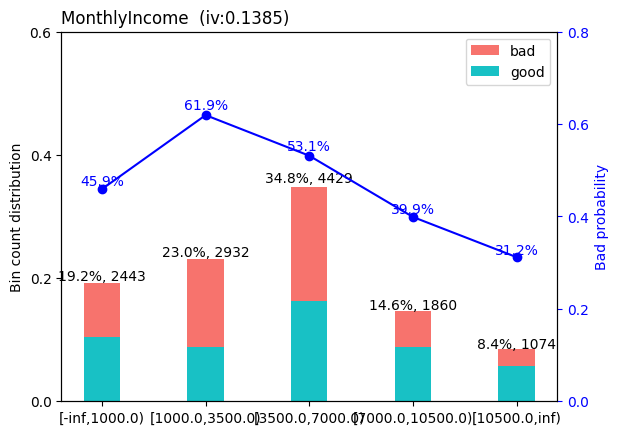

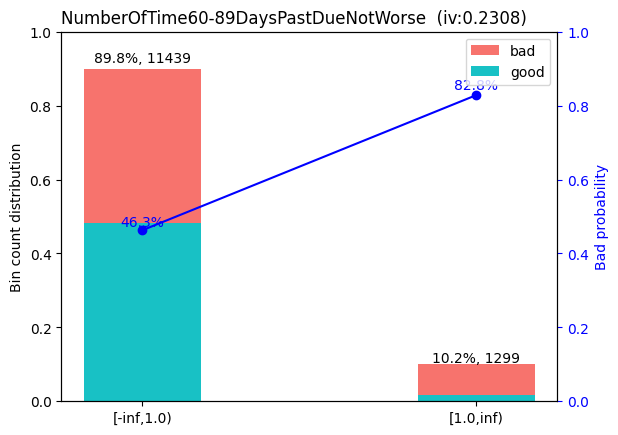

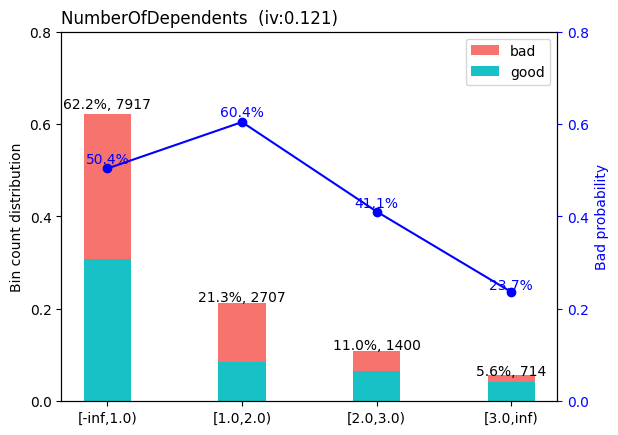

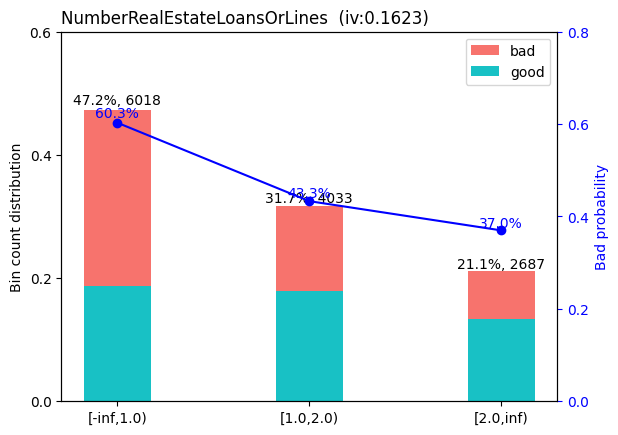

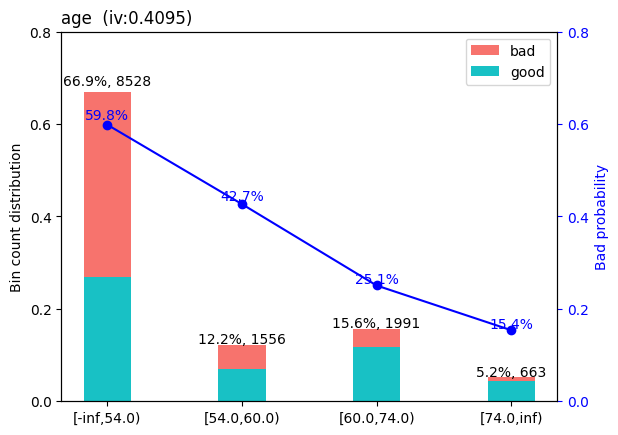

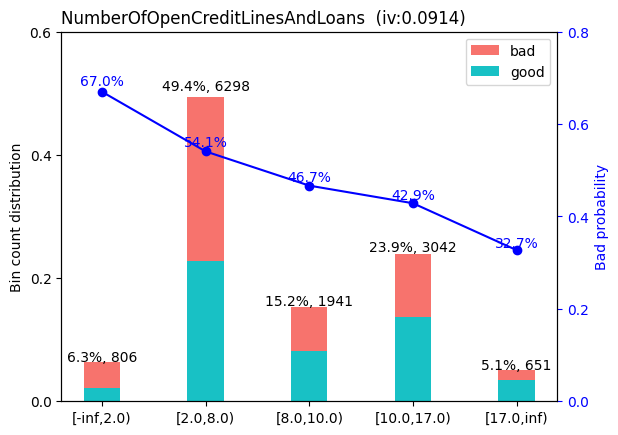

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

## Manual adjustment

In this case, OthDebt and Income don't follow an explainable trend, so we need to make manual adjustments. We can make this interactively within the package  with the excelent function ```woebin_adj``` that allows us to make adjustments one by one. We start by invoking the function, note the bar at the end.

In [61]:
#breaks_adj = sc.woebin_adj(train, "Default", bins)

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

{'NumberOfTime30-59DaysPastDueNotWorse': <Figure size 640x480 with 2 Axes>,
 'RevolvingUtilizationOfUnsecuredLines': <Figure size 640x480 with 2 Axes>,
 'DebtRatio': <Figure size 640x480 with 2 Axes>,
 'NumberOfTimes90DaysLate': <Figure size 640x480 with 2 Axes>,
 'MonthlyIncome': <Figure size 640x480 with 2 Axes>,
 'NumberOfTime60-89DaysPastDueNotWorse': <Figure size 640x480 with 2 Axes>,
 'NumberOfDependents': <Figure size 640x480 with 2 Axes>,
 'NumberRealEstateLoansOrLines': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'NumberOfOpenCreditLinesAndLoans': <Figure size 640x480 with 2 Axes>}

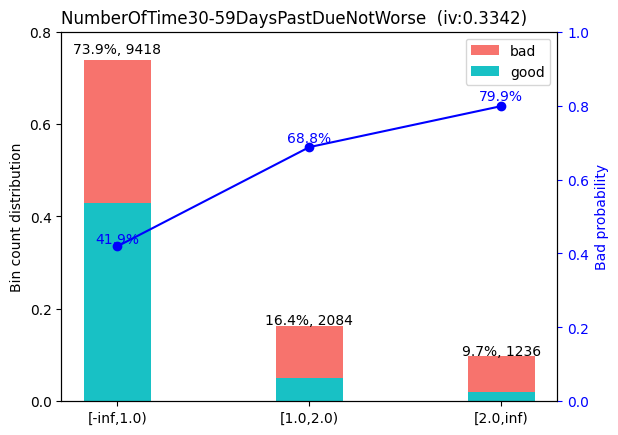

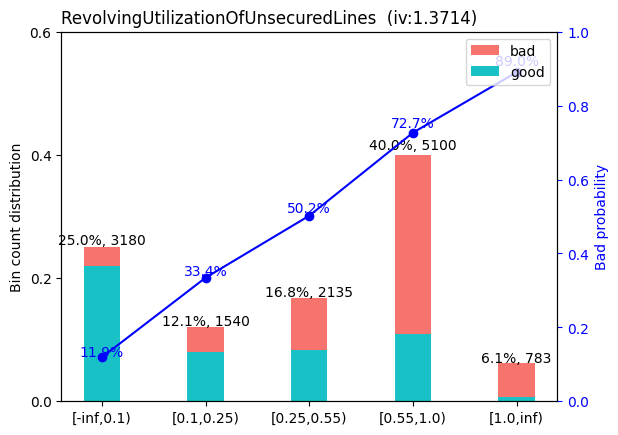

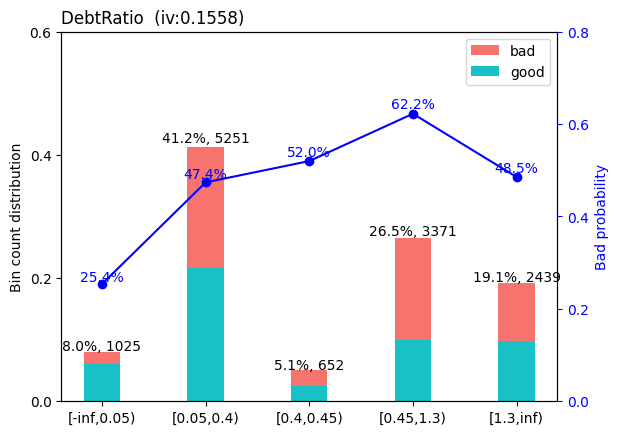

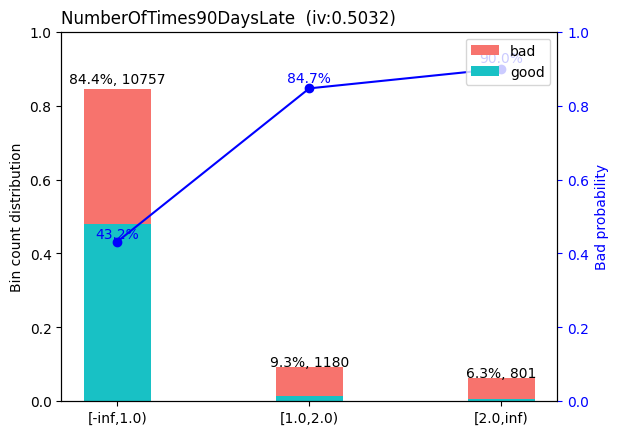

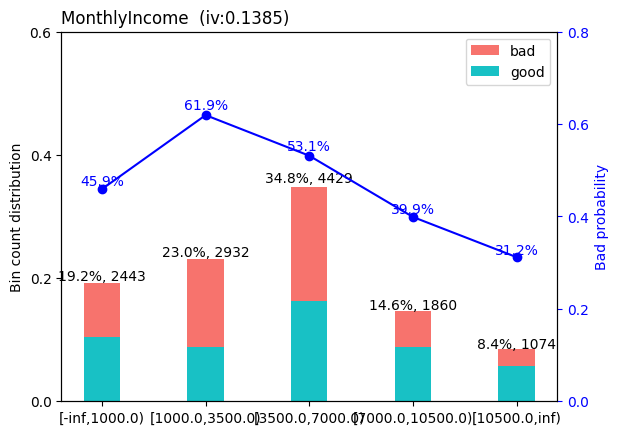

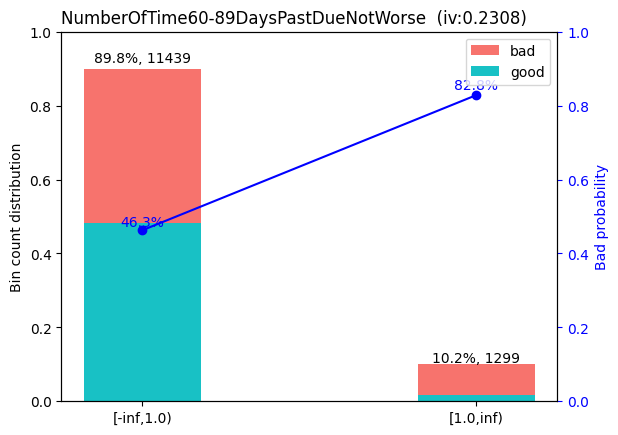

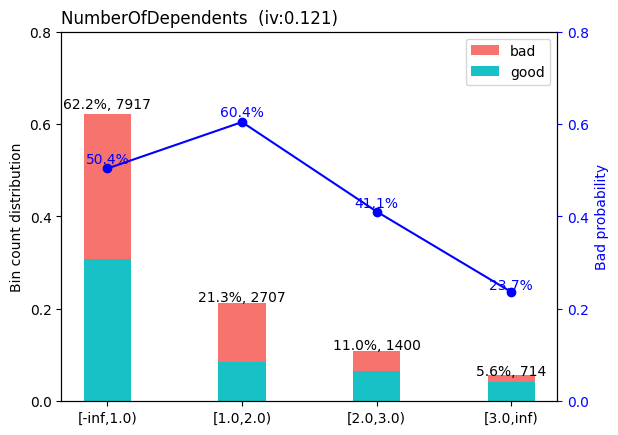

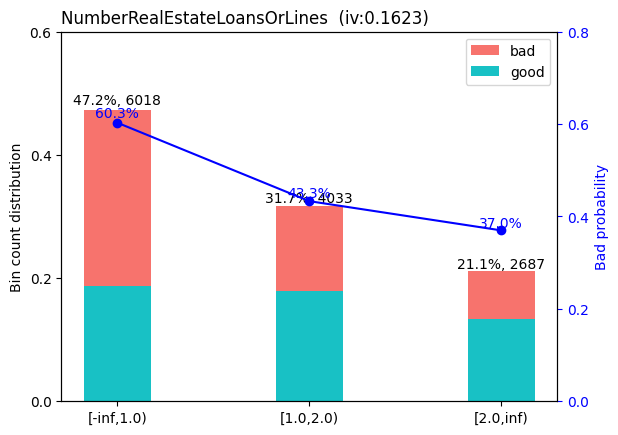

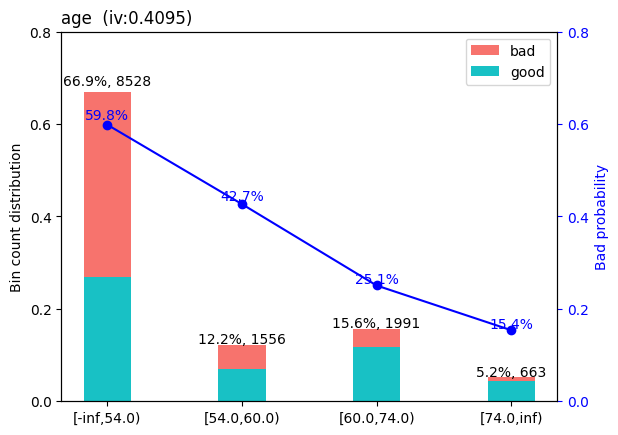

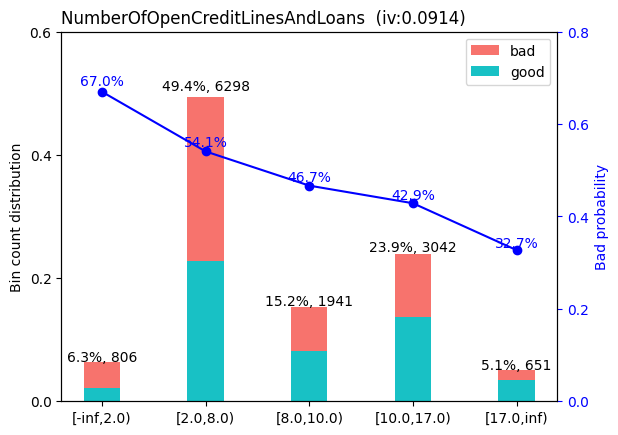

In [62]:

#no need to run this block if you have changed the bins before, see course video for detail#
breaks_adj = {
    # Below are the intervals for different bins
 #       "DebtRatio": [0.3, 0.45, 0.8, 2.55], "NumberOfOpenCreditLinesAndLoans": [6.0],
  #      'NumberRealEstateLoansOrLines': [1, 2],	'RevolvingUtilizationOfUnsecuredLines':[0.55],
   # "MonthlyIncome": [1000, 5000.0, 7000.0], 'NumberOfTime30-59DaysPastDueNotWorse':[1]
}
bins_adj = sc.woebin(train, y="Default", breaks_list=breaks_adj)
sc.woebin_plot(bins_adj)




In [63]:
#Now that we are happy with the binnings, **we need to apply it to both of our datasets**.
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [64]:
train_woe.head()

,Default,NumberOfTime30-59DaysPastDueNotWorse_woe,RevolvingUtilizationOfUnsecuredLines_woe,DebtRatio_woe,NumberOfTimes90DaysLate_woe,MonthlyIncome_woe,NumberOfTime60-89DaysPastDueNotWorse_woe,NumberOfDependents_woe,NumberRealEstateLoansOrLines_woe,age_woe,NumberOfOpenCreditLinesAndLoans_woe
0,0,-0.325633,0.977776,-0.104838,-0.272947,0.486885,-0.149416,0.423661,0.417388,0.399215,0.163590
1,0,0.789016,0.977776,-0.104838,1.708258,0.486885,-0.149416,0.015410,0.417388,0.399215,0.163590
2,0,-0.325633,-0.688281,-1.079194,-0.272947,0.486885,-0.149416,0.015410,0.417388,0.399215,0.163590
3,0,-0.325633,-0.688281,-0.104838,-0.272947,0.126155,-0.149416,0.423661,-0.268904,-1.704748,0.163590
4,0,-0.325633,0.977776,-0.104838,-0.272947,0.126155,-0.149416,0.015410,0.417388,0.399215,-0.133117


## IV Filtering

Now we can check the information value of our variables and remove those who are not predictive. We use the function ```iv```. In general:

- $IV < 0.02$: No predictive ability, remove.
- $0.02 \le IV < 0.1$: Small predictive ability, suggest to remove.
- $0.1 \le IV < 0.3$: Medium predictive ability, leave.
- $0.3 \le IV < 1$: Good predictive ability, leave.
- $1 \le IV $: Strong predictive ability. Suspicious variable. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [65]:
sc.iv(train_woe, 'Default')

,variable,info_value
3,RevolvingUtilizationOfUnsecuredLines_woe,1.371435
7,NumberOfTimes90DaysLate_woe,0.503202
4,age_woe,0.409493
0,NumberOfTime30-59DaysPastDueNotWorse_woe,0.334175
1,NumberOfTime60-89DaysPastDueNotWorse_woe,0.230795
8,NumberRealEstateLoansOrLines_woe,0.162333
6,DebtRatio_woe,0.155787
9,MonthlyIncome_woe,0.138527
2,NumberOfDependents_woe,0.121026
5,NumberOfOpenCreditLinesAndLoans_woe,0.091406


In [66]:
# Check column order.
train_woe.columns

Index(['Default', 'NumberOfTime30-59DaysPastDueNotWorse_woe',
       'RevolvingUtilizationOfUnsecuredLines_woe', 'DebtRatio_woe',
       'NumberOfTimes90DaysLate_woe', 'MonthlyIncome_woe',
       'NumberOfTime60-89DaysPastDueNotWorse_woe', 'NumberOfDependents_woe',
       'NumberRealEstateLoansOrLines_woe', 'age_woe',
       'NumberOfOpenCreditLinesAndLoans_woe'],
      dtype='object')

In [67]:
# Create range of accepted variables
#train_woe = train_woe.drop(['NumberOfDependents_woe'],axis=1)
#test_woe = test_woe.drop(['NumberOfDependents_woe'],axis=1)
#train_woe.head()

In [68]:
#test_woe.head()

## Saving the results.

Now we are ready to apply models! We have our train and test datasets ready. We can now save the csv into our local file system or our Google Drive. In the latter case, the process is a bit complicated, as it requires us to connect our accounts. The detailed instructions are [here](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c).

We will download the data to our own hard drive. First we need to save our data as csv, using the function [```to_csv```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [69]:
train_woe.to_csv("train_woe.csv", index = False)
test_woe.to_csv("test_woe.csv", index = False)
!ls # Linux commands to check what files are in the computer. - this is colab!!!

'Credit data.csv'   drive   sample_data   test_woe.csv	 train_woe.csv


Now we can download these two files. Next lab we'll import them. We have the subpackage ```files``` provided by Google, with functions ```upload``` and ```download``` for this.

In [70]:
#from google.colab import files
#files.download("train_woe.csv")

In [71]:
#files.download("test_woe.csv")

In [72]:
# Create training and test set for random forest without WoE
# Same train-test split as before (because of seed!)
bankloan_train_noWoE, bankloan_test_noWoE = sc.split_df(bankloan_data.iloc[:, 1:],
                                                        y = 'Default',
                                                        ratio = 0.7,
                                                        seed = 36621943).values()

from imblearn.over_sampling import SMOTE
# Extract features (X) and target (y) from training and testing sets
X_train = bankloan_train_noWoE.drop(columns=['Default'])  # Training features
y_train = bankloan_train_noWoE['Default']                # Training target

X_test = bankloan_test_noWoE.drop(columns=['Default'])   # Testing features
y_test = bankloan_test_noWoE['Default']                  # Testing target

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=36621943)  # Random seed for reproducibility
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Merge 2 dataframe X_train_resampled and y_train_resampled
bankloan_train_noWoE = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [73]:
# Save
bankloan_train_noWoE.to_csv("bankloan_train_noWoE.csv", index = False)
bankloan_test_noWoE.to_csv("bankloan_test_noWoE.csv", index = False)